In [1]:
import sqlite3
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pylab
%matplotlib inline
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score, accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

In [2]:
stock_data=pd.read_csv(r'C:\Users\My\Downloads\Acadgild\Projects\ML\data_stocks.csv')

In [3]:
stock_data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [4]:
stock_data.shape

(41266, 502)

In [5]:
stock_data.dtypes[0:502]

DATE              int64
SP500           float64
NASDAQ.AAL      float64
NASDAQ.AAPL     float64
NASDAQ.ADBE     float64
NASDAQ.ADI      float64
NASDAQ.ADP      float64
NASDAQ.ADSK     float64
NASDAQ.AKAM     float64
NASDAQ.ALXN     float64
NASDAQ.AMAT     float64
NASDAQ.AMD      float64
NASDAQ.AMGN     float64
NASDAQ.AMZN     float64
NASDAQ.ATVI     float64
NASDAQ.AVGO     float64
NASDAQ.BBBY     float64
NASDAQ.BIIB     float64
NASDAQ.CA       float64
NASDAQ.CBOE     float64
NASDAQ.CELG     float64
NASDAQ.CERN     float64
NASDAQ.CHRW     float64
NASDAQ.CHTR     float64
NASDAQ.CINF     float64
NASDAQ.CMCSA    float64
NASDAQ.CME      float64
NASDAQ.COST     float64
NASDAQ.CSCO     float64
NASDAQ.CSX      float64
                 ...   
NYSE.USB        float64
NYSE.UTX        float64
NYSE.V          float64
NYSE.VAR        float64
NYSE.VFC        float64
NYSE.VLO        float64
NYSE.VMC        float64
NYSE.VNO        float64
NYSE.VTR        float64
NYSE.VZ         float64
NYSE.WAT        

In [6]:
stock_data.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

In [7]:
stock_data.columns

Index(['DATE', 'SP500', 'NASDAQ.AAL', 'NASDAQ.AAPL', 'NASDAQ.ADBE',
       'NASDAQ.ADI', 'NASDAQ.ADP', 'NASDAQ.ADSK', 'NASDAQ.AKAM', 'NASDAQ.ALXN',
       ...
       'NYSE.WYN', 'NYSE.XEC', 'NYSE.XEL', 'NYSE.XL', 'NYSE.XOM', 'NYSE.XRX',
       'NYSE.XYL', 'NYSE.YUM', 'NYSE.ZBH', 'NYSE.ZTS'],
      dtype='object', length=502)

In [8]:
stock_data.describe()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
count,4.126600e+04,41266.000000,41266.000000,41266.000000,41266.00000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,...,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000
mean,1.497749e+09,2421.537882,47.708346,150.453566,141.31793,79.446873,103.480398,102.998608,50.894352,122.981163,...,97.942211,104.740666,46.664402,43.043984,80.784595,19.300718,54.541988,71.757891,121.423515,60.183874
std,3.822211e+06,39.557135,3.259377,6.236826,6.91674,2.000283,4.424244,9.389788,4.833931,11.252010,...,5.411795,10.606694,1.508444,1.714533,1.840989,11.686532,3.526321,4.038272,5.607070,3.346887
min,1.491226e+09,2329.139900,40.830000,140.160000,128.24000,74.800000,95.870000,83.000000,44.650000,96.250000,...,83.410000,89.510000,44.090000,39.120000,76.060000,6.660000,48.820000,63.180000,110.120000,52.300000
25%,1.494432e+09,2390.860100,44.945400,144.640000,135.19500,78.030000,101.300000,94.820000,47.440000,116.950000,...,95.960000,95.010000,45.155000,41.955000,80.220000,7.045000,51.630000,69.110000,117.580000,59.620000
50%,1.497638e+09,2430.149900,48.360000,149.945000,142.26000,79.410000,102.440000,106.820000,49.509900,123.620000,...,99.250000,99.660000,46.810000,43.200000,81.150000,27.890000,53.850000,73.470000,120.650000,61.585600
75%,1.501090e+09,2448.820100,50.180000,155.065000,147.10000,80.580000,104.660000,110.490000,52.230000,132.218800,...,102.080000,117.034700,47.730000,44.370000,82.062050,30.470000,57.140000,74.750000,126.000000,62.540000
max,1.504210e+09,2490.649900,54.475000,164.510000,155.33000,90.440000,121.770000,119.270000,62.560000,142.875000,...,106.375000,123.870000,49.660000,47.210000,83.630000,32.930000,62.130000,77.120000,133.450000,63.840000


In [9]:
stock_data['DATE'] = pd.to_datetime(stock_data['DATE'],unit='s')

In [10]:
stock_data.head()


,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,2017-04-03 13:30:00,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,2017-04-03 13:31:00,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,2017-04-03 13:32:00,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,2017-04-03 13:33:00,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,2017-04-03 13:34:00,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [11]:
stock_data_copy = stock_data.copy()

In [12]:
DF_list = {}
DF_list1 = {}
df2 = pd.DataFrame()
for column in stock_data_copy.columns[1:]:
    try :
        df_col = column.split('.')[1]
        #print(df_col)
    except :
        df_col = column        
        
    Open = stock_data_copy.groupby([stock_data_copy['DATE'].dt.date])[column].first()
    Low = stock_data_copy.groupby([stock_data_copy['DATE'].dt.date])[column].min()
    High = stock_data_copy.groupby([stock_data_copy['DATE'].dt.date])[column].max()
    Close = stock_data_copy.groupby([stock_data_copy['DATE'].dt.date])[column].last()
        
    df = pd.DataFrame([Open,Close,Low,High])
    #df1 = pd.concat([df1,Close])
    df1 = pd.DataFrame([Close])
    
    df = df.transpose()
    df1 = df1.transpose()
    
    df.columns = ['Open','Low','High','Close']
    df1.columns = [df_col]
    
    DF_list[df_col] = df
    DF_list1[df_col] = df1

In [13]:
df5 = DF_list1['AAL'].reset_index()
for item in DF_list1.keys():
    df5 = pd.merge(df5,DF_list1[item].reset_index())
df5.index = df5['DATE']
df5 = df5.drop('DATE', axis=1)

In [14]:
df5.head()

,AAL,SP500,AAPL,ADBE,ADI,ADP,ADSK,AKAM,ALXN,AMAT,...,WYN,XEC,XEL,XL,XOM,XRX,XYL,YUM,ZBH,ZTS
DATE,,,,,,,,,,,,,,,,,,,,,
2017-04-03,42.48,2358.9600,143.700,129.62,81.22,101.27,85.39,58.10,119.28,38.89,...,84.01,118.11,44.39,39.39,82.08,7.25,49.43,63.55,121.35,53.175
2017-04-04,40.90,2359.9600,144.770,130.04,81.24,101.45,84.95,59.30,118.30,39.00,...,84.18,119.92,44.50,39.71,82.34,7.22,50.36,63.84,120.78,52.640
2017-04-05,41.31,2352.8401,144.020,129.89,80.04,101.93,83.54,58.80,116.21,38.38,...,84.34,117.65,44.81,39.37,82.53,7.15,50.41,63.87,120.17,52.670
2017-04-06,41.72,2357.6699,143.685,130.15,80.32,101.75,84.07,58.73,115.49,38.59,...,85.17,118.14,44.60,39.80,83.02,7.13,50.93,64.56,120.22,52.680
2017-04-07,41.81,2355.6899,143.340,130.22,80.01,102.19,84.79,58.10,115.62,38.93,...,84.69,118.22,44.40,39.82,82.78,7.13,50.84,64.28,119.88,52.550


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


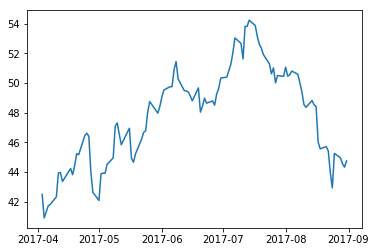

In [15]:
plt.plot(df5['AAL'])

Text(0, 0.5, 'Price')

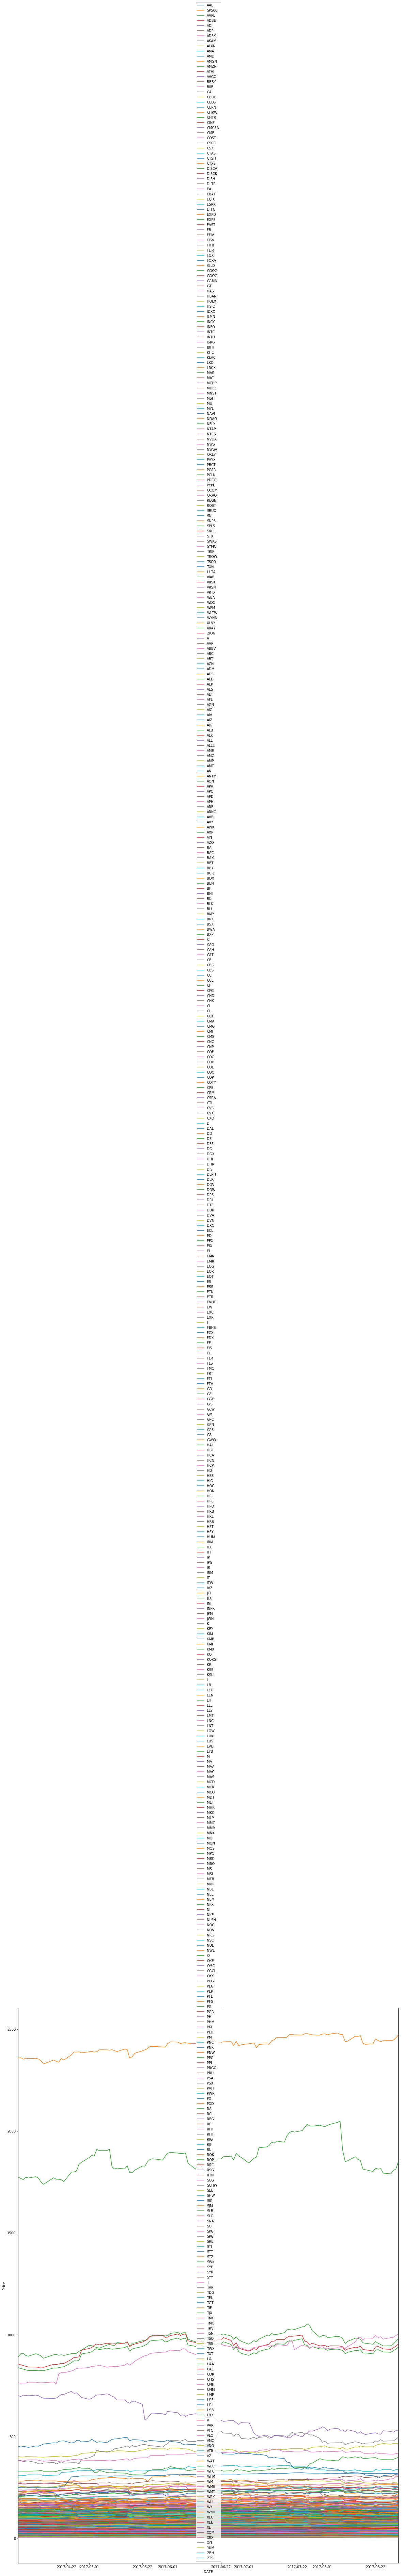

In [16]:
df5.plot(figsize=(20,30))
plt.ylabel('Price')

Text(0, 0.5, 'Daily Percentage Return')

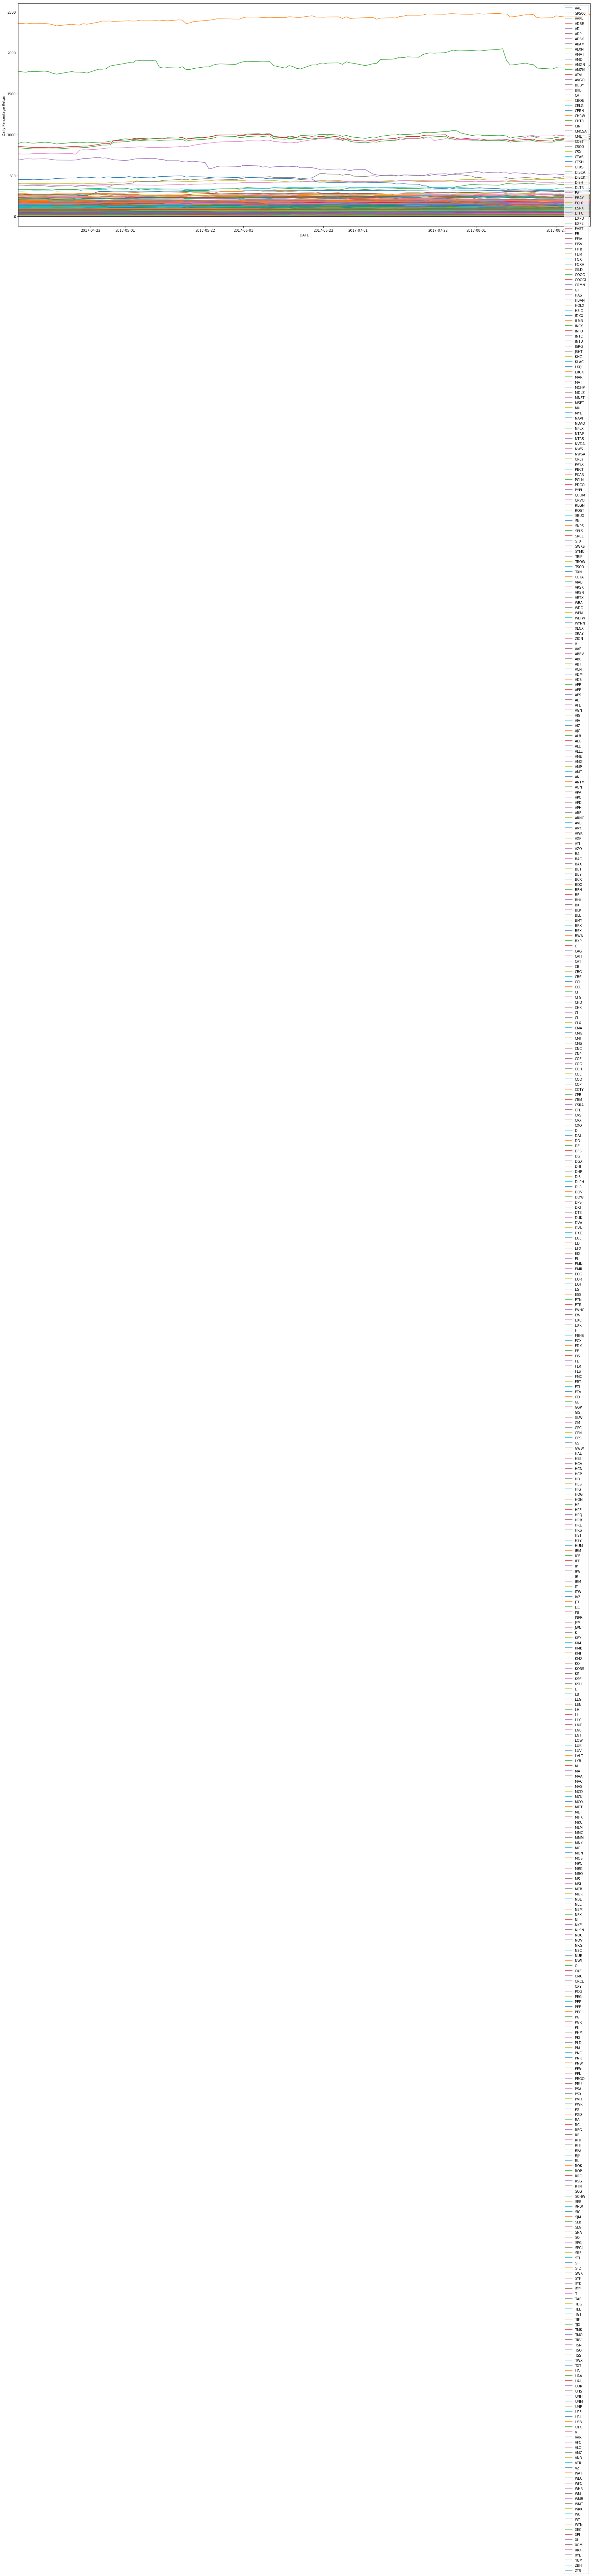

In [17]:
df6=df5.pct_change()
 
df5.plot(figsize=(30,12))
plt.axhline(0, color='black', lw=1)
plt.ylabel('Daily Percentage Return')

In [18]:
df5.describe()

,AAL,SP500,AAPL,ADBE,ADI,ADP,ADSK,AKAM,ALXN,AMAT,...,WYN,XEC,XEL,XL,XOM,XRX,XYL,YUM,ZBH,ZTS
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,...,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,47.719717,2421.181520,150.372602,141.345755,79.393632,103.468726,102.977642,50.874151,122.935896,43.287453,...,97.951406,104.527208,46.692689,43.034094,80.753389,19.350755,54.565895,71.785327,121.467255,60.199583
std,3.272090,40.031479,6.271409,6.950568,1.984853,4.424074,9.402722,4.889023,11.344494,2.475571,...,5.372775,10.630346,1.520344,1.722385,1.856846,11.739667,3.547956,4.083456,5.642329,3.333979
min,40.900000,2329.139900,140.680000,129.050000,75.490000,96.460000,83.540000,44.910000,97.700000,37.520000,...,84.010000,91.300000,44.390000,39.370000,76.086300,6.880000,48.870000,63.550000,110.160000,52.550000
25%,44.942500,2391.602550,144.597500,135.237500,77.995000,101.316250,94.902500,47.402500,117.020000,41.740000,...,95.980000,95.020000,45.145000,41.905000,80.182675,7.050000,51.580000,69.125000,117.750000,59.723750
50%,48.410000,2429.670050,150.065000,142.055000,79.230000,102.440000,106.730000,49.495000,123.670000,43.675000,...,99.345000,99.579500,46.855000,43.275000,81.074500,27.937500,53.960000,73.530000,120.815000,61.565000
75%,50.307500,2447.609975,155.237500,147.302500,80.547500,104.587500,110.640000,52.130000,132.172500,44.992500,...,102.092500,116.675000,47.775000,44.302500,82.080000,30.547500,57.027500,74.770000,125.900000,62.557500
max,54.220000,2480.600100,163.980000,155.160000,86.130000,118.910000,114.970000,62.500000,142.410000,47.450000,...,105.380000,121.910000,49.530000,46.670000,83.460000,32.550000,62.070000,76.810000,132.650000,63.500000


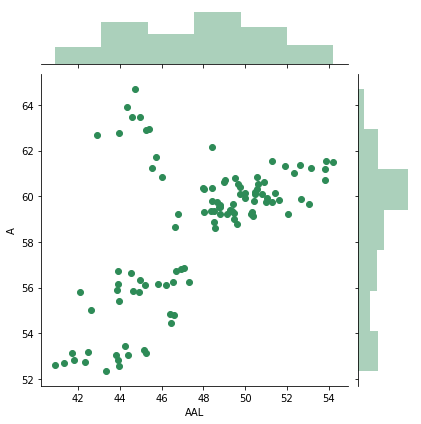

In [19]:
import seaborn as sns
sns.jointplot('AAL', 'A', df5, kind='scatter', color='seagreen')

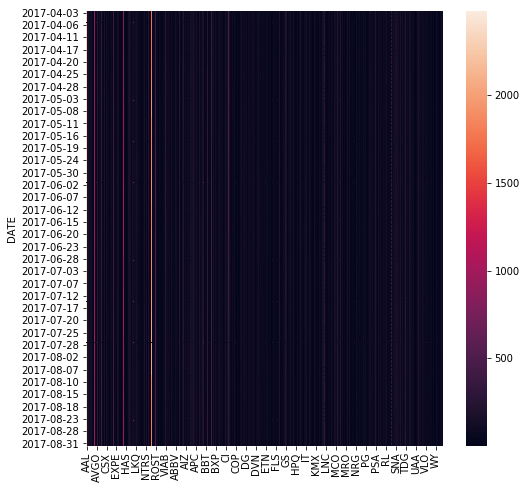

In [20]:
plt.figure(figsize=(8,8))
sns.heatmap(df5.dropna())

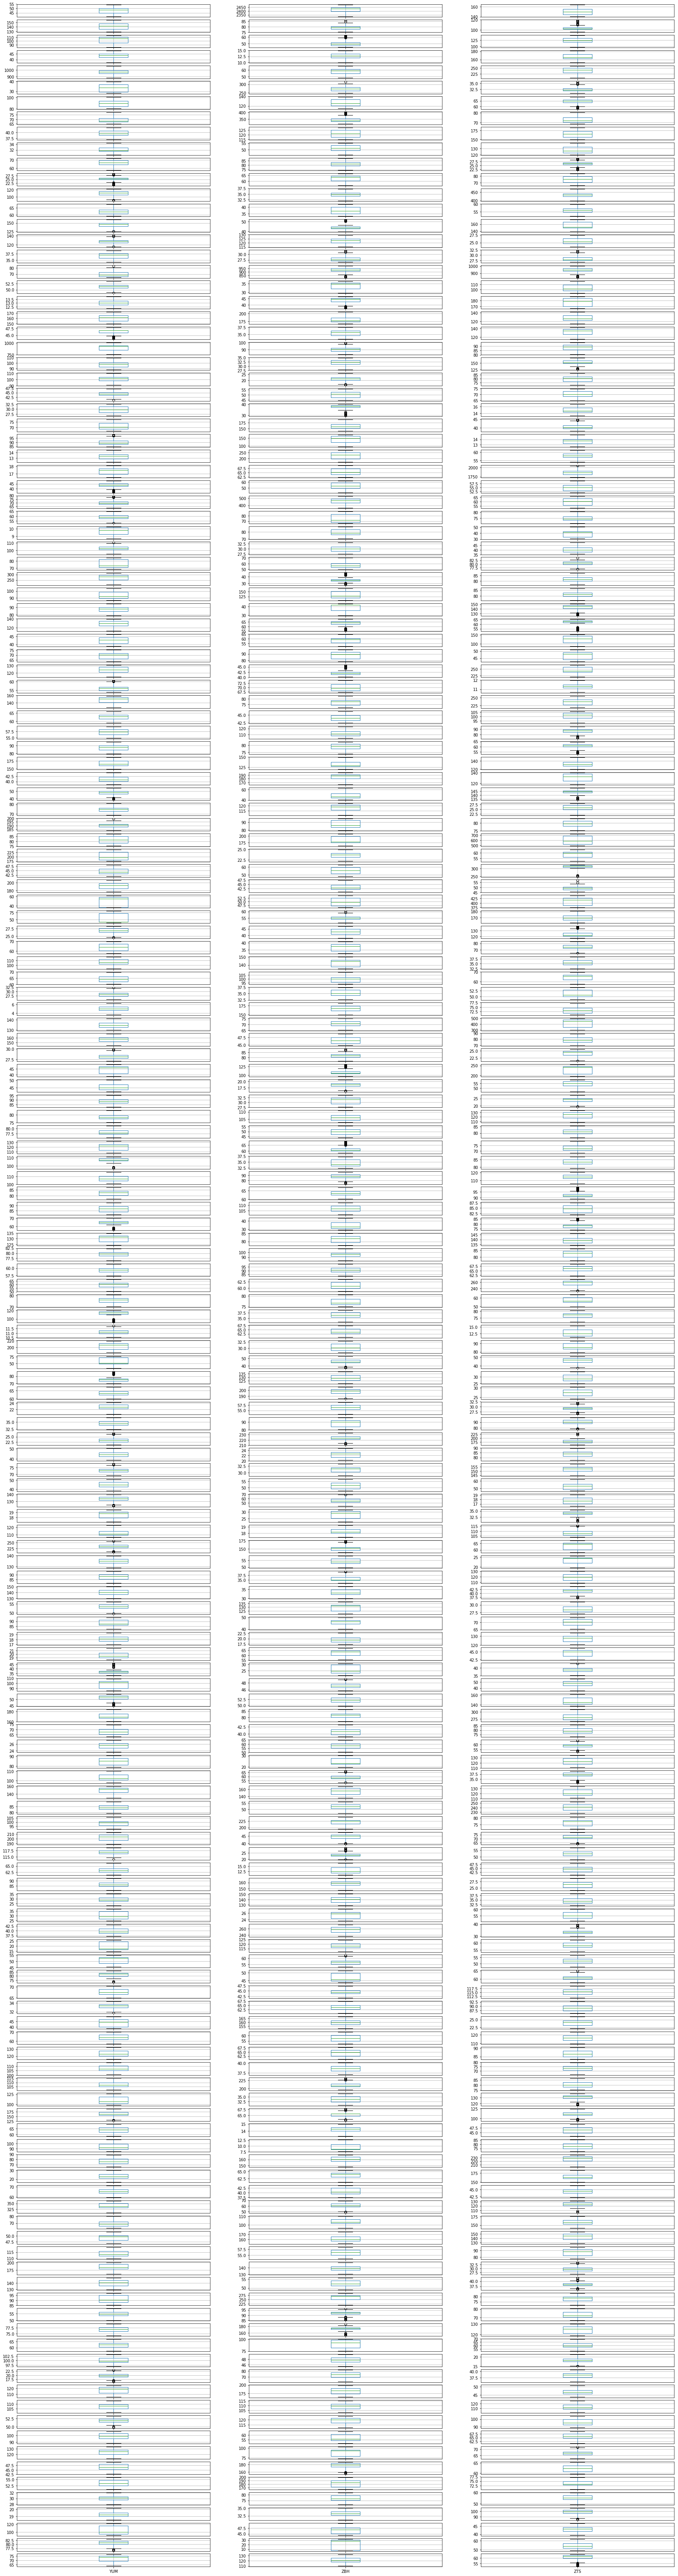

In [21]:
fig, axes = plt.subplots(len(df5.columns)//3, 3, figsize=(30, 120))

i = 0
for triaxis in axes:
    for axis in triaxis:
        df5.boxplot(column = df5.columns[i], ax=axis)
        i = i+1 
plt.show()

In [22]:
def standard_scaler(X_train, X_test):
    train_samples, train_nx, train_ny = X_train.shape
    test_samples, test_nx, test_ny = X_test.shape
    
    X_train = X_train.reshape((train_samples, train_nx * train_ny))
    X_test = X_test.reshape((test_samples, test_nx * test_ny))
    
    preprocessor = prep.StandardScaler().fit(X_train)
    X_train = preprocessor.transform(X_train)
    X_test = preprocessor.transform(X_test)
    
    X_train = X_train.reshape((train_samples, train_nx, train_ny))
    X_test = X_test.reshape((test_samples, test_nx, test_ny))
    
    return X_train, X_test

In [ ]:
pip show tensorflow

In [24]:
pip install tensorflow

  Stored in directory: C:\Users\My\AppData\Local\pip\Cache\wheels\8e\28\49\fad4e7f0b9a1227708cbbee4487ac8558a7334849cb81c813d
  Stored in directory: C:\Users\My\AppData\Local\pip\Cache\wheels\2c\b1\94\43d03e130b929aae7ba3f8d15cbd7bc0d1cb5bb38a5c721833
  Stored in directory: C:\Users\My\AppData\Local\pip\Cache\wheels\5c\2e\7e\a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
  Stored in directory: C:\Users\My\AppData\Local\pip\Cache\wheels\7c\06\54\bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
Successfully built absl-py opt-einsum gast termcolor
Note: you may need to restart the kernel to use updated packages.


tensorboard 2.0.2 has requirement setuptools>=41.0.0, but you'll have setuptools 40.8.0 which is incompatible.


In [48]:
import time
import math
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
import numpy as np
import pandas as pd
import sklearn.preprocessing as prep

In [49]:
def build_model(layers):
    model = Sequential()

    # By setting return_sequences to True we are able to stack another LSTM layer
    model.add(LSTM(
        input_dim=layers[0],
        output_dim=layers[1],
        return_sequences=True))
    model.add(Dropout(0.4))

    model.add(LSTM(
        layers[2],
        return_sequences=False))
    model.add(Dropout(0.3))

    model.add(Dense(
        output_dim=layers[3]))
    model.add(Activation("linear"))

    start = time.time()
    model.compile(loss="mse", optimizer="rmsprop", metrics=['accuracy'])
    print("Compilation Time : ", time.time() - start)
    return model

In [50]:
window = 20
X_train, y_train, X_test, y_test = preprocess_data(df5[:: -1], window)
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (76, 20, 501)
y_train (76,)
X_test (9, 20, 501)
y_test (9,)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [51]:
model = build_model([X_train.shape[2], window, 100, 1])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 501..., units=20)`
  


Compilation Time :  0.05800485610961914


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`


In [52]:
model.fit(
    X_train,
    y_train,
    batch_size=768,
    epochs=300,
    validation_split=0.1,
    verbose=0)

In [55]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))

Train Score: 0.09 MSE (0.30 RMSE)
Test Score: 3.12 MSE (1.77 RMSE)


In [56]:
diff = []
ratio = []
pred = model.predict(X_test)
for u in range(len(y_test)):
    pr = pred[u][0]
    ratio.append((y_test[u] / pr) - 1)
    diff.append(abs(y_test[u] - pr))

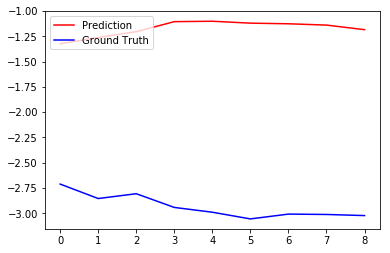

In [57]:
import matplotlib.pyplot as plt2

plt2.plot(pred, color='red', label='Prediction')
plt2.plot(y_test, color='blue', label='Ground Truth')
plt2.legend(loc=2)
plt2.show()